In [1]:
##Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading data from the csv file and creating the dataframe

emp_health_df = pd.read_csv('emp_health.csv')

In [3]:
#Reading some rows of dataset

emp_health_df.head(5) 

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520


In [4]:
#Learn data types of all features

emp_health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1338 non-null   object 
 1   age          1338 non-null   int64  
 2   sex          1338 non-null   object 
 3   bmi          1338 non-null   float64
 4   dependent    1338 non-null   int64  
 5   alcohol      1338 non-null   object 
 6   smoke        1338 non-null   object 
 7   zone         1338 non-null   object 
 8   expenditure  1338 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 94.2+ KB


In [5]:
#See the statistical properties of the data.

emp_health_df.describe()

,age,bmi,dependent,expenditure
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


1. How many employees above 50 age smoke, what is their average expenditure on health management?

In [6]:
sum((emp_health_df.age > 50) & (emp_health_df.smoke == 'yes'))

64

In [7]:
emp_health_df.loc[(emp_health_df.age > 50) & (emp_health_df.smoke == 'yes')]['expenditure'].mean()

38820.22308234376

2. How many female employees did not consume alcohol daily. What is their proportion with respect to total female employees?

In [8]:
sum(emp_health_df[emp_health_df['sex'] == 'female']['alcohol'] != 'daily')

453

In [41]:
sum(emp_health_df[emp_health_df['sex'] == 'female']['alcohol'] != 'daily') / (emp_health_df['sex'] == 'female').count()

0.33856502242152464

3. Display zone wise average expenditure of employees on health

In [10]:
emp_health_df.groupby('zone').mean()['expenditure']

zone
east         13774.679941
north        14102.583403
northeast    13694.721724
northwest    12151.702619
south        14715.689519
southeast    14452.949680
southwest    12717.083869
west         12182.998872
Name: expenditure, dtype: float64

4. Employees of which zone did maximum expenditure on health

In [11]:
#emp_health_df.loc[emp_health_df.expenditure == emp_health_df.expenditure.max()]

emp_health_df.loc[emp_health_df.expenditure == emp_health_df.expenditure.max()]['zone'] ##easy syntax of using loc and . rather than []

543    southeast
Name: zone, dtype: object

5. What is the minimum expenditure done by any employee in organization

In [12]:
#emp_health_df[emp_health_df['expenditure'] == emp_health_df['expenditure'].min()]
#emp_health_df.loc[emp_health_df.expenditure == emp_health_df.expenditure.min()]

emp_health_df['expenditure'].min()

1121.8739

6. What is average expenditure of employees who have 2 or lesser dependents

In [42]:
emp_health_df.loc[emp_health_df.dependent <= 2]['expenditure'].mean()

13040.970970948154

7. How many employees are below age of 20 years. What is their average BMI

In [14]:
emp_health_df.loc[emp_health_df.age < 20]['age'].count()

137

In [44]:
emp_health_df.loc[emp_health_df.age < 20]['bmi'].mean()

29.97149635036496

8. Create a dataframe "non_smoker" for all non-smoker male employees

In [16]:
data = emp_health_df.loc[(emp_health_df.sex == 'male') & (emp_health_df.smoke == 'no')]

non_smoker = pd.DataFrame(data=data)
non_smoker

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
8,i10020,37,male,29.830,2,party,no,north,6406.41070
...,...,...,...,...,...,...,...,...,...
1324,i11336,31,male,25.935,1,daily,no,west,4239.89265
1325,i11337,61,male,33.535,0,party,no,east,13143.33665
1327,i11339,51,male,30.030,1,daily,no,southeast,9377.90470
1329,i11341,52,male,38.600,2,party,no,southwest,10325.20600


9. Create a dataframe "non_alcoholic" for all male employees who do not consume alcohol

In [17]:
data_1 = emp_health_df.loc[(emp_health_df.sex == 'male') & (emp_health_df.alcohol == 'no')]

non_alcoholic = pd.DataFrame(data=data_1)
non_alcoholic

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
18,i10030,56,male,40.300,0,no,no,southwest,10602.38500
24,i10036,37,male,28.025,2,no,no,northwest,6203.90175
28,i10040,23,male,17.385,1,no,no,northwest,2775.19215
37,i10049,26,male,20.800,0,no,no,southwest,2302.30000
38,i10050,35,male,36.670,1,no,yes,north,39774.27630
...,...,...,...,...,...,...,...,...,...
1291,i11303,19,male,34.900,0,no,yes,southwest,34828.65400
1301,i11313,62,male,30.875,3,no,yes,west,46718.16325
1310,i11322,42,male,26.315,1,no,no,west,6940.90985
1320,i11332,31,male,31.065,3,no,no,west,5425.02335


10. Create a dataframe called "non_smoking_alcoholic" with the men employees who do not smoke and consume alcohol. 
#The dataframe should contain columns id, smoke, alcohol

In [18]:
non_smoking_alcoholic = non_smoker.merge(non_alcoholic, how = 'inner', left_on=['id','age','sex','bmi','dependent','alcohol','smoke','zone','expenditure'],
                                         right_on=['id','age','sex','bmi','dependent','alcohol','smoke','zone','expenditure'])

non_smoking_alcoholic.drop(['age','sex','bmi','dependent','zone','expenditure'],axis = 1, inplace = True)
non_smoking_alcoholic

,id,alcohol,smoke
0,i10030,no,no
1,i10036,no,no
2,i10040,no,no
3,i10049,no,no
4,i10079,no,no
...,...,...,...
104,i11273,no,no
105,i11282,no,no
106,i11322,no,no
107,i11332,no,no


11. What is the count for each zone with respect to number of dependent

In [19]:
emp_health_df.groupby('zone').count()['dependent']

zone
east         262
north         70
northeast     74
northwest    145
south         84
southeast    198
southwest    251
west         254
Name: dependent, dtype: int64

12. Classify the employees into 3 categories.
 #Category 1 : employees below 18.5 bmi - underweight
 #Category 2 : employees with bmi in the range of 18.5 to 24.9 - fit
 #Category 3 : employee with bmi over 24.9 - overweight
 #What is the average expenditure of employees in each category.
 #Display the bar chart for the same


In [21]:
underweight =  emp_health_df.loc[emp_health_df.bmi < 18.5]

fit = emp_health_df.loc[(emp_health_df.bmi >= 18.5) & (emp_health_df.bmi <= 24.9)]

overweight = emp_health_df.loc[emp_health_df.bmi > 24.9]

In [22]:
#average expenditure of employees who are underweight

underweight['expenditure'].mean() 

8852.200585

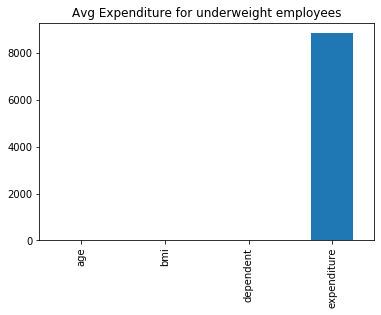

In [23]:
underweight.mean().plot(kind='bar',title='Avg Expenditure for underweight employees')
plt.show()

In [24]:
#average expenditure of employees who are fit

fit['expenditure'].mean()

10379.499732162161

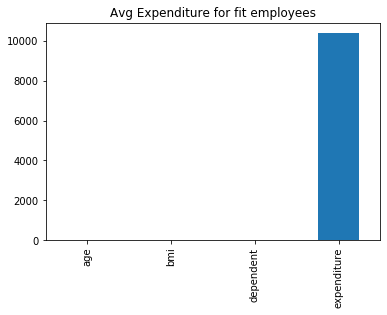

In [25]:
fit.mean().plot(kind='bar',title='Avg Expenditure for fit employees')
plt.show()

In [26]:
#average expenditure of employees who are overweight

overweight['expenditure'].mean()

13936.616823466244

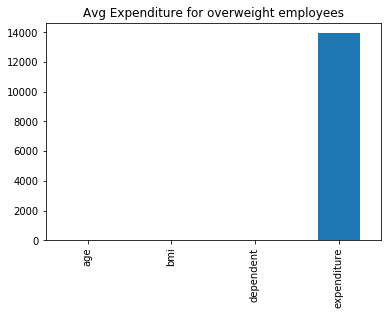

In [27]:
overweight.mean().plot(kind='bar',title='Avg Expenditure for overweight employees')
plt.show()

13. Draw line plot of expenditure against age and BMI

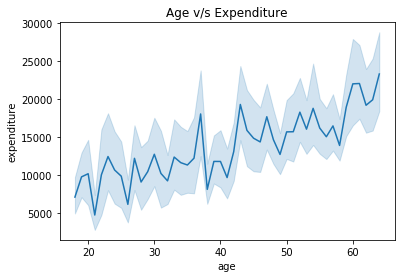

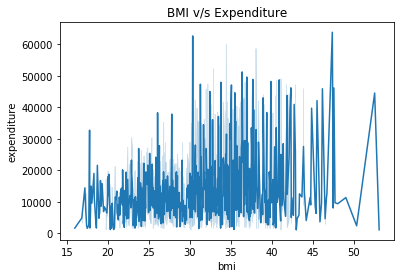

In [46]:
sns.lineplot(x='age',y='expenditure',data=emp_health_df)
plt.title('Age v/s Expenditure')
plt.show()

sns.lineplot(x='bmi',y='expenditure',data=emp_health_df)
plt.title('BMI v/s Expenditure')
plt.show()

14. Draw a bar chart to show zone wise average expenditure

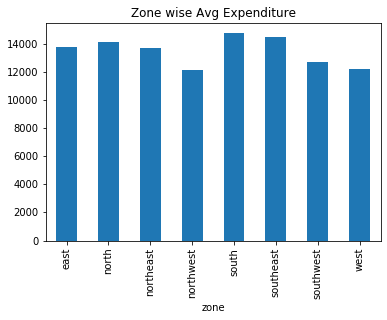

In [29]:
emp_health_df.groupby('zone').mean()['expenditure'].plot(kind='bar',title='Zone wise Avg Expenditure')
plt.show()

15. Draw a bar chart to show smoking and alcoholic habits against average expenditure

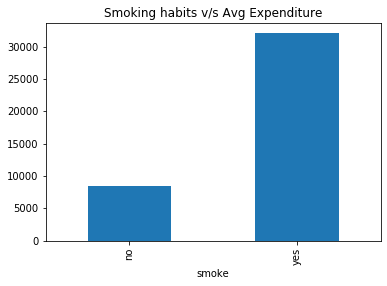

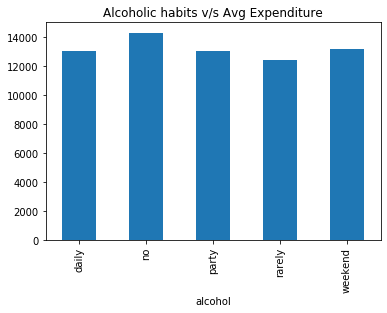

In [30]:
emp_health_df.groupby('smoke').mean()['expenditure'].plot(kind='bar',title='Smoking habits v/s Avg Expenditure')
plt.show()

emp_health_df.groupby('alcohol').mean()['expenditure'].plot(kind='bar',title='Alcoholic habits v/s Avg Expenditure')
plt.show()

In [31]:
#to find the value counts for each category in alcohol column to plot the required Pie chart
emp_health_df.alcohol.value_counts() 

daily      395
weekend    347
party      278
no         259
rarely      59
Name: alcohol, dtype: int64

16. Draw pie chart for alcohol consumption habits

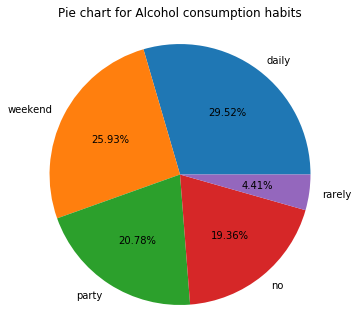

In [32]:
plt.pie(emp_health_df.alcohol.value_counts(),labels=['daily','weekend','party','no','rarely'],autopct='%.2f%%',radius=1.5)
plt.title('Pie chart for Alcohol consumption habits',y=1.2)
plt.show()

17. Draw scatterplot to see the relation between age and expenditure, keep smoking habit as hue

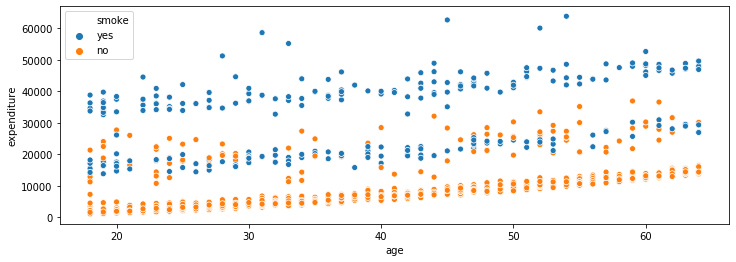

In [33]:
plt.figure(figsize=(12,4))
sns.scatterplot(emp_health_df['age'],emp_health_df['expenditure'], hue = emp_health_df['smoke'])
plt.legend(loc='upper left')
plt.show()

18. Draw distribution plot of expenditure

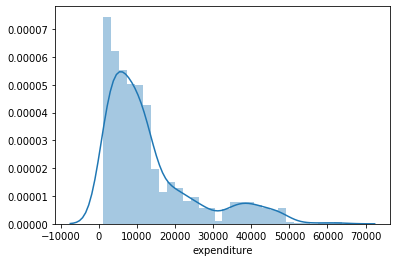

In [3]:
sns.distplot(emp_health_df['expenditure'],bins=30)
plt.show()

19. Display the pairplot

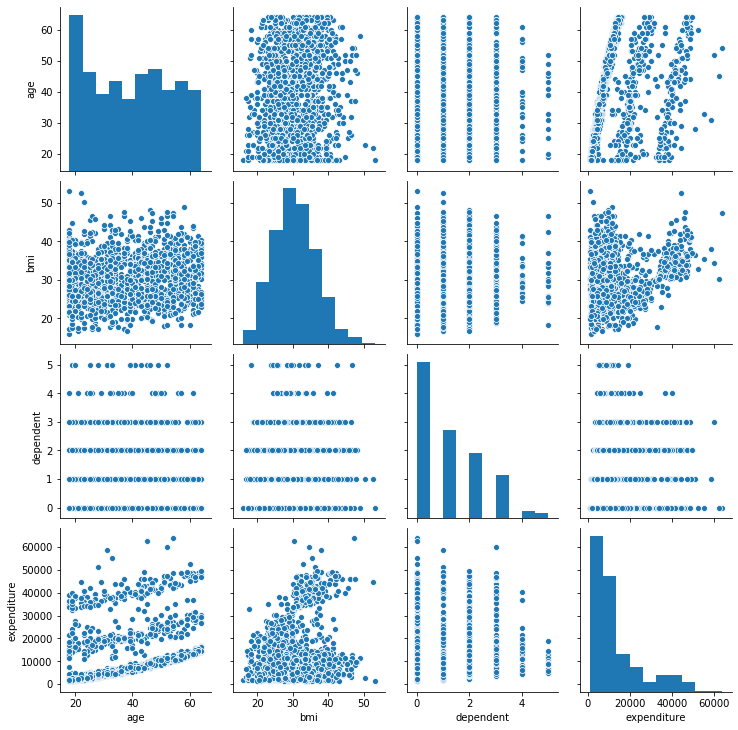

In [35]:
sns.pairplot(data=emp_health_df)
plt.show()

20. Display heatmap for the data

In [36]:
#for heatmap, we first need to find correlation between the data points
emp_health_df.corr()

,age,bmi,dependent,expenditure
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
dependent,0.042469,0.012759,1.000000,0.067998
expenditure,0.299008,0.198341,0.067998,1.000000


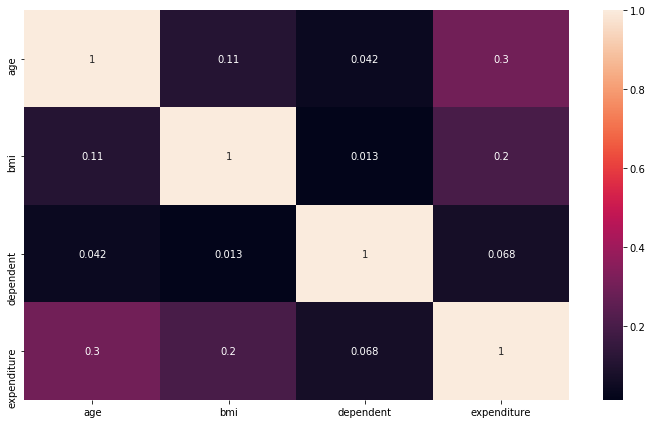

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(emp_health_df.corr(), annot=True)              
plt.show()